<a href="https://colab.research.google.com/github/marcio-lfo/devai/blob/main/Exercicio_Regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Obtendo a base de dados boston de forma alternativa tendo em vista que o load_boston foi descontinuado

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
target = boston.values[1::2, 2]

In [ ]:
# A base alternativa não possui alguns atributos como feature_names
boston.keys()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [ ]:
boston

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
# Utilizando data e target
X, y = data, target
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
X.shape, y.shape

((506, 13), (506,))

Observa-se que tem 506 amostras.
Essas amostras possuem 13 características.
Temos um resultado com apenas um vetor com 506 resultados

0


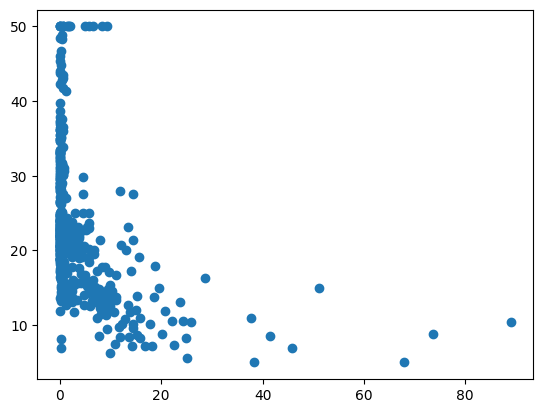

1


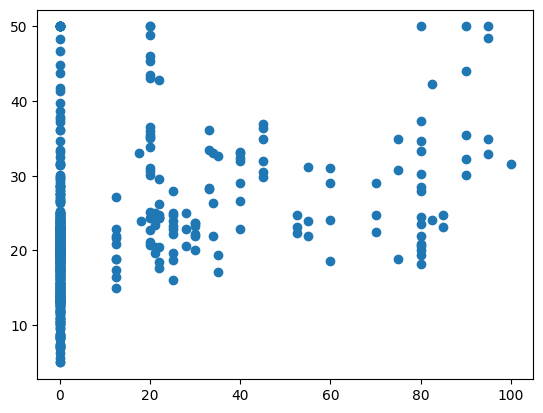

2


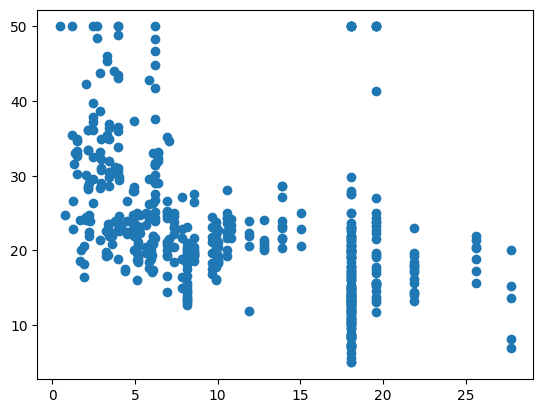

3


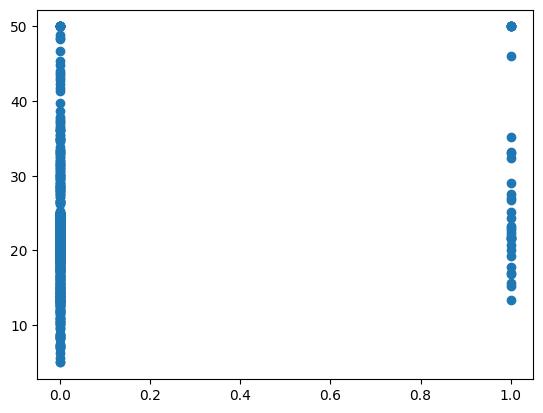

4


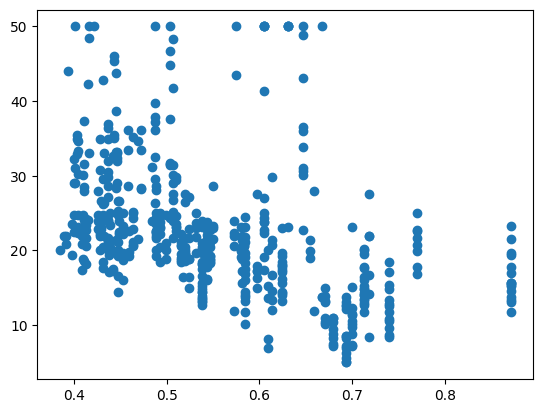

5


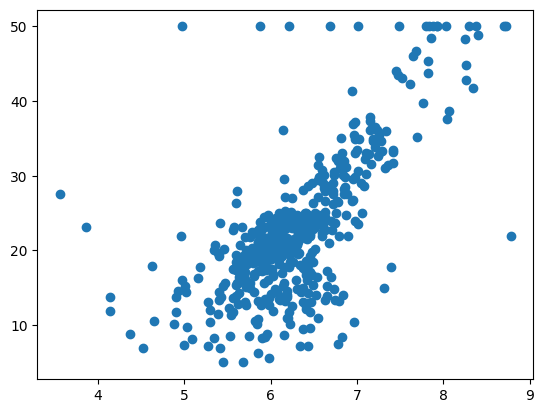

6


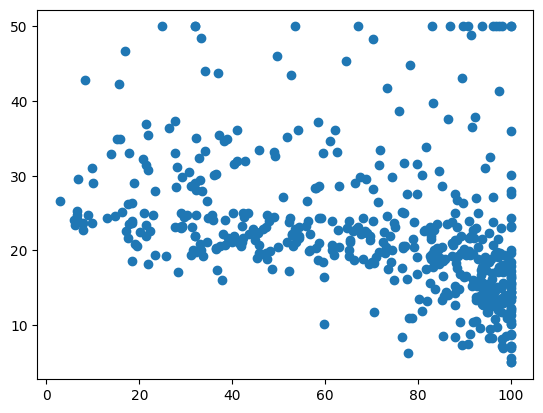

7


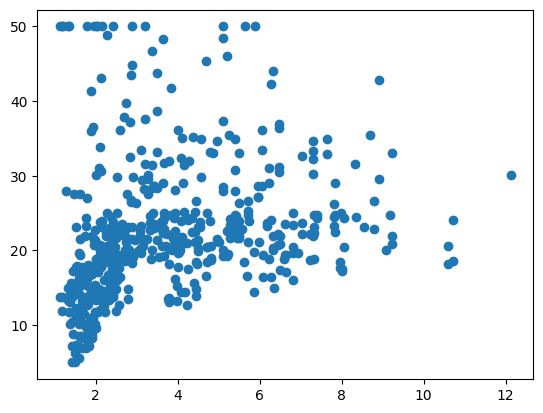

8


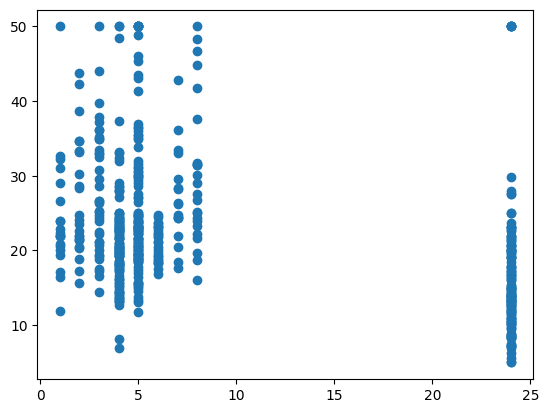

9


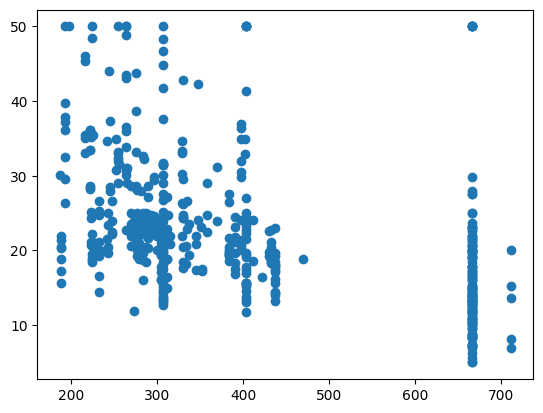

10


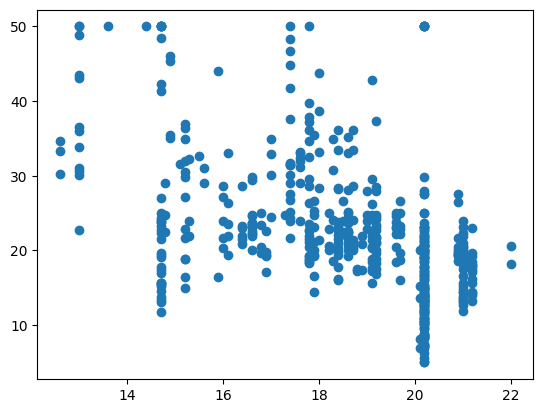

11


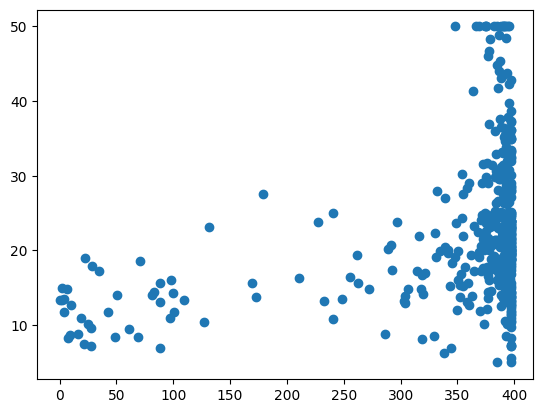

12


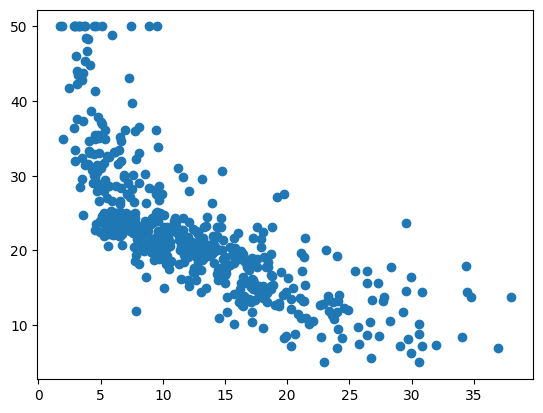

In [ ]:
# Para ver como as características estão relacionadas com as respostas, vamos plotar cada característica contra o y

import matplotlib.pylab as plt
for i in range(X.shape[1]):
      print(i)
      plt.scatter(X[:,i],y)
      plt.show()

A gente pode ver a correlação entre a característica e a resposta e a gente pode procurar aquela que vai fornecer a melhor correlação para a gente conseguir fazer um modelo linear.
No exemplo acima utilizaremos a característica 0 que a gente pode tentar fazer uma aproximação linear.
Como seria esse modelo linear?

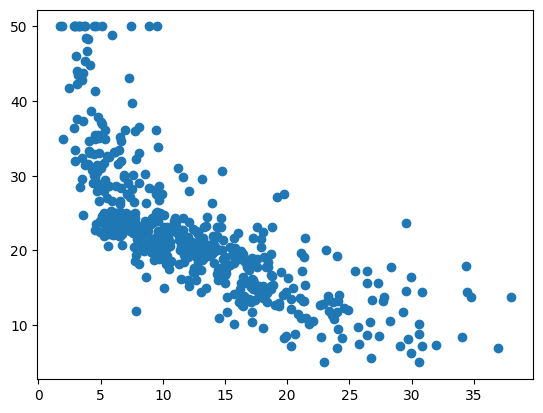

In [ ]:
# Vamos separar essa característica, vamos chamar de X12

X12 = X[:,12:13]
plt.scatter(X12, y)
plt.show()

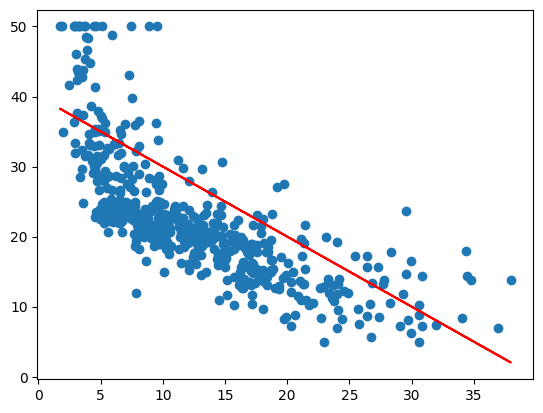

In [ ]:
# Definindo um modelo linear a partir de uma função

def modelo_linear(X, a, b):
      y = a*X + b
      return y

y_pred = modelo_linear(X12, -1, 40)
plt.scatter(X12, y)
plt.plot(X12, y_pred, 'r')
plt.show()

In [ ]:
# Obtendo o Erro Absoluto Médio (MAE)

def mae(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yAbs = abs(yDiff)
    errorSum = sum(yAbs)
    mae = errorSum/len(yAbs)
    return mae

mae(y, y_pred)



array([6.96547431])

In [ ]:
# Obtendo o Erro Quadrático Médio (MSE)

def mse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return mse

mse(y, y_pred)


array([61.78580296])

In [ ]:
# Obtendo a Raiz do Erro Médio Quadrático (RMSE)

from math import sqrt

def rmse(y, ypred):
    yDiff = ypred - y.reshape(-1,1)
    yDiffSquare = yDiff**2
    errorSum = sum(yDiffSquare)
    mse = errorSum/len(yDiffSquare)
    return sqrt(mse)

rmse(y, y_pred)


7.860394580708203

In [ ]:
# Utilizando as bibliotecas do scikit-learn

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Calculando o MAE
mae = mean_absolute_error(y, y_pred)

# Canculando o MSE
mse = mean_squared_error(y, y_pred)

# Exibindo os valores
print("Erro Absoluto Médio (MAE):", mae)
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", sqrt(mse))


Erro Absoluto Médio (MAE): 6.9654743083003945
Erro Quadrático Médio (MSE): 61.78580296442688
Raiz do Erro Quadrático Médio (RMSE): 7.860394580708203


Erro Quadrático Médio (MSE) com dados zerados: 592.1469169960474
Erro Quadrático Médio (MSE):, com dados conhecidos 61.78580296442688


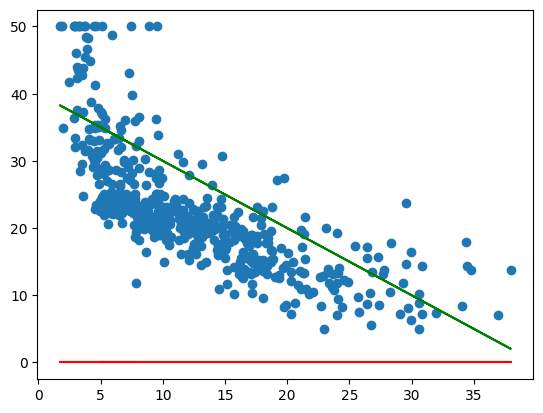

In [ ]:
# Construindo um modelo de aprendizado dentro de uma classe do Python
# Utilizando dados conhecidos para o coeficiente e a constante

class regressao_linear():
      def __init__(self):       # construtor
          self.a = 0            # coeficiente
          self.b = 0            # constante
      def fit(self, X, y):
          self.a = -1
          self.b = 40
      def predict(self, X):     # predizendo o rótulo de uma base dada como entrada
          y = self.a*X + self.b
          return y
plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print("Erro Quadrático Médio (MSE) com dados zerados:", mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print("Erro Quadrático Médio (MSE):, com dados conhecidos", mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'g')
plt.show()

A linha verde tem um desempenho muito melhor do que a linha vermelha.
Precisamos atualizar os valores dos dados do coeficiente e da constante de acordo com o erro. A constante (b) está muito baixa, vamos começar aumentando a constante. Não queremos atualizar com valor fixo, então primeiro vamos entender como é o problema, quão ruim está a solução para poder melhorá-la.

592.1469169960474
Valor do erro: [-11401.6]
Valor do erro reduzido pelo tamanho da amostra: [-22.53280632]


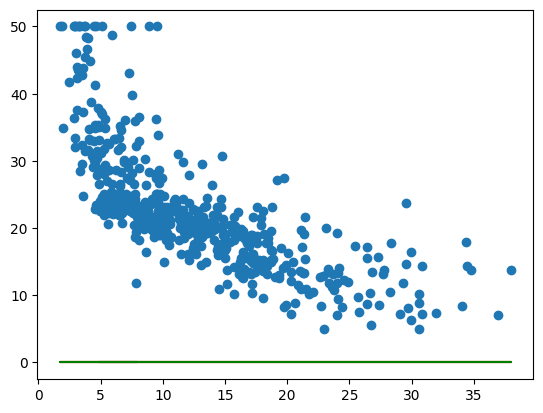

In [ ]:
# Construindo um modelo de aprendizado intuitivo e iterativo para ajustar aos dados dentro de uma classe do Python
# Entendendo melhor o erro, como ajustar este peso para diminuir o erro e depois que fizer a redução eu vou colocar novamente o erro quadrático médio para saber se está melhorando ou não
# Antes de tudo vamos calcular se esse erro é positivo ou negativo
# O erro é negativo é está muito alto -11401.6
# Podemos reduzir pelo tamanho da amostra

class regressao_linear():
      def __init__(self):       # construtor
          self.a = 0            # coeficiente
          self.b = 0            # constante
      def fit(self, X, y):
          ypred = self.predict(X)
          erro = ypred - y.reshape(-1,1)
          print("Valor do erro:", sum(erro))
          print("Valor do erro reduzido pelo tamanho da amostra:", sum(erro)/len(erro))

      def predict(self, X):     # predizendo o rótulo de uma base dada como entrada
          y = self.a*X + self.b
          return y
plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
plt.plot(X12, ypred, 'g')
plt.show()

592.1469169960474
84.41955615616554
84.41955615616554


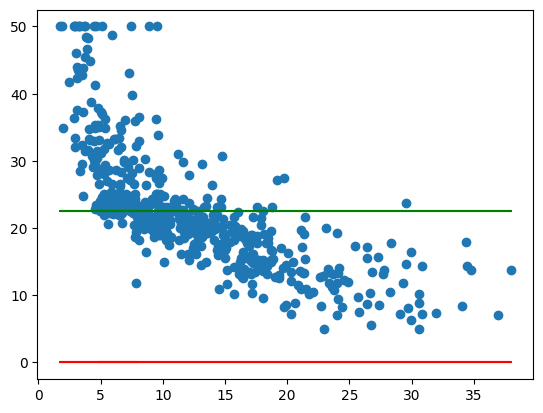

In [ ]:
# Construindo um modelo de aprendizado intuitivo e iterativo para ajustar aos dados dentro de uma classe do Python


class regressao_linear():
      def __init__(self):       # construtor
          self.a = 0            # coeficiente
          self.b = 0            # constante
      def fit(self, X, y):
          ypred = self.predict(X)
          erro = ypred - y.reshape(-1,1)
          ajusteB = (sum(erro)/len(erro))
          self.b = self.b - ajusteB

          ypred = self.predict(X)
          erro = ypred - y.reshape(-1,1)
          print(mean_squared_error(y, ypred))

      def predict(self, X):     # predizendo o rótulo de uma base dada como entrada
          y = self.a*X + self.b
          return y
plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'g')
plt.show()

Observa-se que a situação melhorou, o final está bem melhor, mas poderia fazer este ajuste várias vezes.

592.1469169960474
Valor do ajuste B: [-22.53280632]
84.41955615616554
Valor do ajuste B: [2.57010048e-14]
84.41955615616554
84.41955615616554


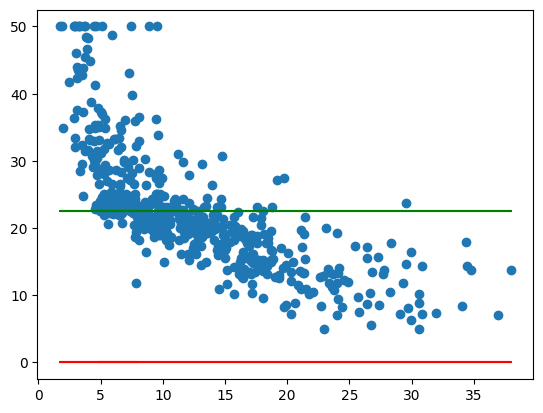

In [ ]:
# Construindo um modelo de aprendizado intuitivo e iterativo para ajustar aos dados dentro de uma classe do Python
# Incluidno um ajuste na constante, ajusteB


class regressao_linear():
      def __init__(self):       # construtor
          self.a = 0            # coeficiente
          self.b = 0            # constante
      def fit(self, X, y):
          for _ in range(2):
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajusteB = (sum(erro)/len(erro))
              print("Valor do ajuste B:", ajusteB)
              self.b = self.b - ajusteB

              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              print(mean_squared_error(y, ypred))

      def predict(self, X):     # predizendo o rótulo de uma base dada como entrada
          y = self.a*X + self.b
          return y
plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
plt.plot(X12, ypred, 'g')
plt.show()

Ao tentar executar o ajuste da constante por duas vezes não melhorou nada. Ao mostrar o ajuste a gente observa que ele é irrisório.
Chegamos na conclusão que não é suficiente só mudar a constante "b". Precisamos então ajustar o coeficiente "a" que multiplica o X. Para calcular a influência do "a" preciso de incluir o X também

24.334069059572574
6.20346413306178


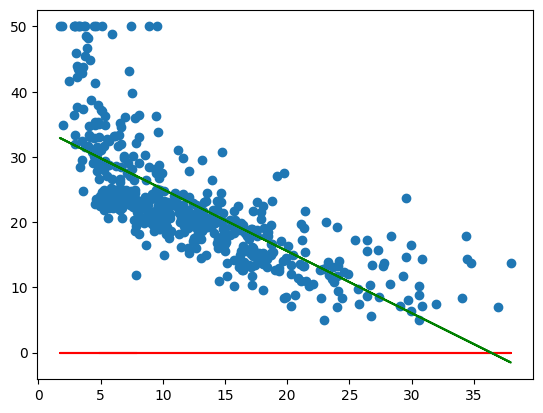

(-0.9500317226790728, 34.55355094057261)

In [ ]:
# Construindo um modelo de aprendizado intuitivo e iterativo para ajustar aos dados dentro de uma classe do Python
# Incluindo ajustes no coeficiente e na constante, ajustes A e B
# Aumentando o número de repetições que eram 2 até 500 para estabilizar


class regressao_linear():
      def __init__(self):       # construtor
          self.a = 0            # coeficiente
          self.b = 0            # constante
      def fit(self, X, y):
          for _ in range(500):                         # aumento do número de repetições
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajusteB = (sum(erro)/len(erro))
              self.b = self.b - 0.1*ajusteB[0]

              ajusteA = sum([erro[i]*X[i] for i in range(X.shape[0])])/sum(X)
              self.a = self.a - 0.1*ajusteA[0]          # dividindo por 10 e colocando para que não seja vetor

      def predict(self, X):     # predizendo o rótulo de uma base dada como entrada
          y = self.a*X + self.b
          return y
plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')
plt.show()

modelo.a, modelo.b


24.334069059572574
6.20346413306178


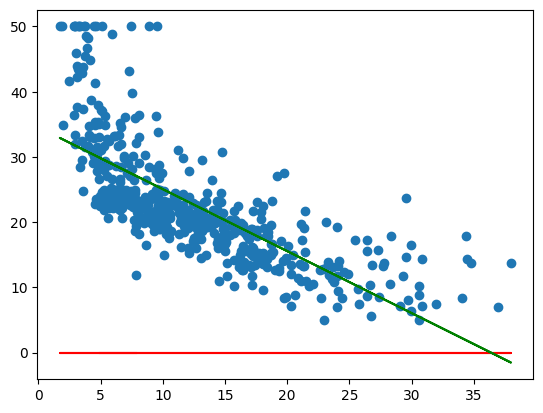

array([[34.55355094],
       [-0.95003172]])

In [ ]:
# Implementando um modelo liner usando uma notação vetorial, para que fique mais eficiente e seguro para se trabalhar
# Foram feitos novos ajustes, criada uma baia e o ajuste será todo de uma vez, simultanemente
# Ao invés de termos um a e b, teremos um self.w


class regressao_linear():
      def __init__(self):                              # construtor
          self.w = np.zeros((2,1))                     # matriz de duas colunas e uma linha composta por zeros

      @staticmethod                                    # método estático
      def addBias(X):
          bias = np.ones((X.shape[0],1))
          X_b = np.concatenate((bias,X), axis=1)
          return X_b

      def fit(self, X, y):
          X_b = self.addBias(X)
          for _ in range(500):                         # aumento do número de repetições
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)       # o ajuste será todo de uma vez, do a e b simultâneamente
              self.w = self.w - 0.1*ajuste

      def predict(self, X):                             # predizendo o rótulo de uma base dada como entrada
          X_b = self.addBias(X)
          y = X_b.dot(self.w)
          return y

plt.scatter(X12, y)
modelo = regressao_linear()
ypred = modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'r')

modelo.fit(X12, y)

ypred = modelo.predict(X12)
print(rmse(y, ypred))
plt.plot(X12, ypred, 'g')
plt.show()

modelo.w

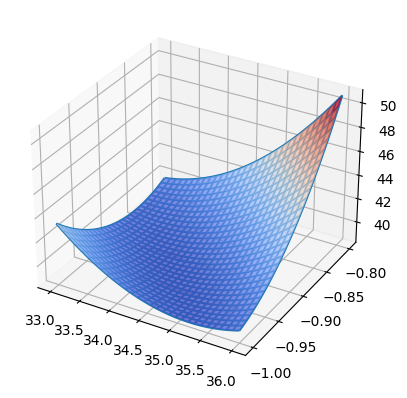

In [ ]:
# Análise da função de erro
# Como esse modelo intuitivo sai dessa linha vermelha para a verde utilizando uma variação do peso do baias w0

w0 = np.linspace(33, 36, 30)        # utilizamos o linspace com intervalo de 33 a 36, pois sabemos que o valor está em 34.5 e colocaremos 30 amostras
w1 = np.linspace(-1, -0.8, 30)

def z_function(w0, w1):
    modelo = regressao_linear()
    Erro = np.empty(w0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = w0[j][k]
            modelo.w[1] = w1[j][k]
            ypred = modelo.predict(X12)             # predição do nosso modelo com a variável global X12
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
w0, w1 = np.meshgrid(w0, w1)
Erro = z_function(w0, w1)

ax.plot_wireframe(w0, w1, Erro)
ax.plot_surface(w0, w1, Erro, rstride=1, cstride=1, alpha=0.75, cmap='coolwarm', edgecolor='none')


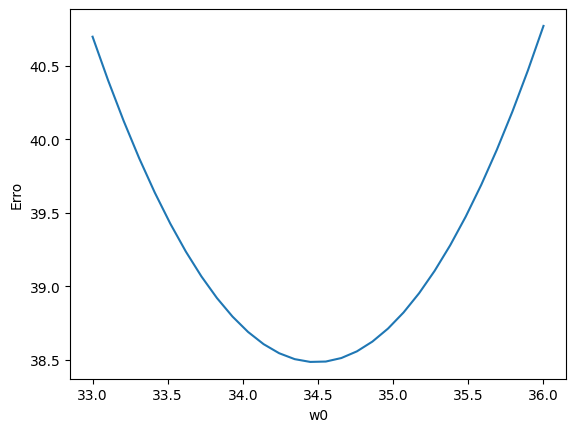

In [ ]:
# Visualizando em 2d para o w0

plt.ylabel("Erro")
plt.xlabel("w0")
i=8
plt.plot(w0[i,:],Erro[i,:])
plt.show()

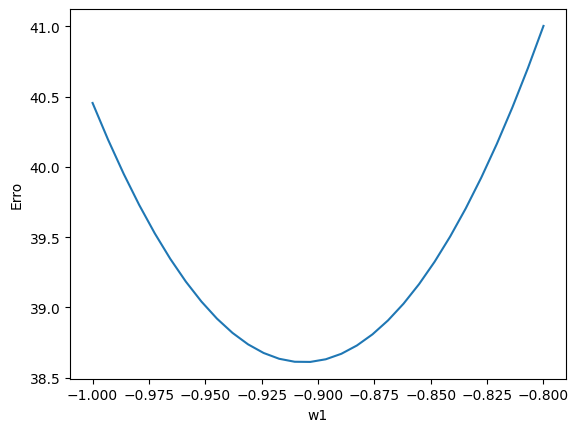

In [ ]:
# Visualizando em 2d para o w1
# Função w1 variando com um w0 fixo, no caso 8º w0

plt.ylabel("Erro")
plt.xlabel("w1")
i=8
plt.plot(w1[:,i],Erro[:,i])
plt.show()

As duas funções são côncavas, são funções do 2° grau, porque o erro que nós estamos calculando e estamos reduzindo é um erro quadrático médio

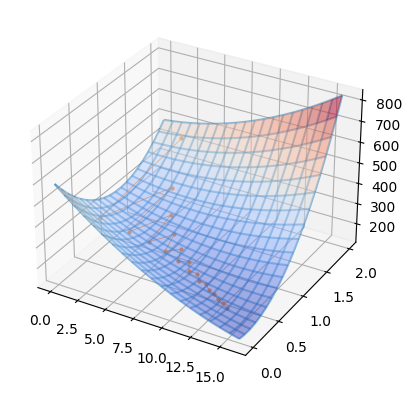

In [ ]:
# Implementando um modelo liner usando uma notação vetorial, para que fique mais eficiente e seguro para se trabalhar
# Foram feitos novos ajustes, adicionado nos campos dele uma lista vazia para guardar o histórico

class regressao_linear():
      def __init__(self):                              # construtor
          self.w = np.zeros((2,1))                     # matriz de duas colunas e uma linha composta por zeros
          self.wh =[]

      @staticmethod                                    # método estático
      def addBias(X):
          bias = np.ones((X.shape[0],1))
          X_b = np.concatenate((bias,X), axis=1)
          return X_b

      def fit(self, X, y):
          X_b = self.addBias(X)
          for _ in range(20):                         # redução do número de repetições de 500 para 20
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)       # o ajuste será todo de uma vez, do a e b simultâneamente
              self.w = self.w - 0.1*ajuste

              ypred = self.predict(X)
              mse = mean_squared_error(y, ypred)
              self.wh.append([self.w[0,0], self.w[1,0], mse])       # guardando o histórico do ajuste

      def predict(self, X):                             # predizendo o rótulo de uma base dada como entrada
          X_b = self.addBias(X)
          y = X_b.dot(self.w)
          return y

w0 = np.linspace(0, 16, 20)        # reajuste no intervalo para ver os primeiros erros que são os mais complicados
w1 = np.linspace(0, 2, 20)

def z_function(w0, w1):
    modelo = regressao_linear()
    Erro = np.empty(w0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = w0[j][k]
            modelo.w[1] = w1[j][k]
            ypred = modelo.predict(X12)             # predição do nosso modelo com a variável global X12
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
w0, w1 = np.meshgrid(w0, w1)
Erro = z_function(w0, w1)

ax.plot_wireframe(w0, w1, Erro, alpha=0.5)
ax.plot_surface(w0, w1, Erro, rstride=1, cstride=1, alpha=0.5, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()                         # criando o modelo para receber essa nova regressão linear
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0], wh[:,1], wh[:,2], marker='o', linewidth='0.5', markersize=2)

plt.show()

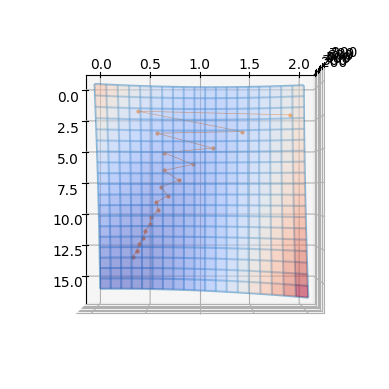

In [ ]:
# Implementando um modelo liner usando uma notação vetorial, para que fique mais eficiente e seguro para se trabalhar
# Visão de cima

class regressao_linear():
      def __init__(self):                              # construtor
          self.w = np.zeros((2,1))                     # matriz de duas colunas e uma linha composta por zeros
          self.wh =[]

      @staticmethod                                    # método estático
      def addBias(X):
          bias = np.ones((X.shape[0],1))
          X_b = np.concatenate((bias,X), axis=1)
          return X_b

      def fit(self, X, y):
          X_b = self.addBias(X)
          for _ in range(20):                         # redução do número de repetições de 500 para 20
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)       # o ajuste será todo de uma vez, do a e b simultâneamente
              self.w = self.w - 0.1*ajuste

              ypred = self.predict(X)
              mse = mean_squared_error(y, ypred)
              self.wh.append([self.w[0,0], self.w[1,0], mse])       # guardando o histórico do ajuste

      def predict(self, X):                             # predizendo o rótulo de uma base dada como entrada
          X_b = self.addBias(X)
          y = X_b.dot(self.w)
          return y

w0 = np.linspace(0, 16, 20)        # reajuste no intervalo para ver os primeiros erros que são os mais complicados
w1 = np.linspace(0, 2, 20)

def z_function(w0, w1):
    modelo = regressao_linear()
    Erro = np.empty(w0.shape)
    for j in range(Erro.shape[0]):
        for k in range(Erro.shape[1]):
            modelo.w[0] = w0[j][k]
            modelo.w[1] = w1[j][k]
            ypred = modelo.predict(X12)             # predição do nosso modelo com a variável global X12
            mse = mean_squared_error(y, ypred)
            Erro[j][k] = mse
    return Erro

ax = plt.axes(projection="3d")
w0, w1 = np.meshgrid(w0, w1)
Erro = z_function(w0, w1)

ax.plot_wireframe(w0, w1, Erro, alpha=0.5)
ax.plot_surface(w0, w1, Erro, rstride=1, cstride=1, alpha=0.5, cmap='coolwarm', edgecolor='none')

modelo = regressao_linear()                         # criando o modelo para receber essa nova regressão linear
modelo.fit(X12,y)
ypred = modelo.predict(X12)
wh = np.array(modelo.wh)
ax.plot(wh[:,0], wh[:,1], wh[:,2], marker='o', linewidth='0.5', markersize=2)

ax.view_init(azim=0, elev=90)

plt.show()

As partes mais vermelhas são as partes onde o erro é maior

In [ ]:
# Antes criamos uma classe e fomos ajustando aos nossos dados e testamos depois

class regressao_linear():
      def __init__(self):                              # construtor
          self.w = np.zeros((2,1))                     # matriz de duas colunas e uma linha composta por zeros

      @staticmethod                                    # método estático
      def addBias(X):
          bias = np.ones((X.shape[0],1))
          X_b = np.concatenate((bias,X), axis=1)
          return X_b

      def fit(self, X, y):
          X_b = self.addBias(X)
          for _ in range(500):                         # aumento do número de repetições
              ypred = self.predict(X)
              erro = ypred - y.reshape(-1,1)
              ajuste = X_b.T.dot(erro)/sum(X_b).reshape(-1,1)       # o ajuste será todo de uma vez, do a e b simultâneamente
              self.w = self.w - 0.1*ajuste

      def predict(self, X):                             # predizendo o rótulo de uma base dada como entrada
          X_b = self.addBias(X)
          y = X_b.dot(self.w)
          return y

modelo = regressao_linear()           # usamos a classe para criar o modelo
modelo.fit(X12, y)                    # ajuste a nossa base
ypred = modelo.predict(X12)           # predições com o modelo
print(mean_squared_error(y, ypred))   # cálculo do erro do modelo
print(modelo.w)                       # parâmetros que esse modelo calculou


38.48296725018393
[[34.55355094]
 [-0.95003172]]


In [ ]:
# Utilizando o sklearn para resolver problemas de regressão linear

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X12, y)
ypred = modelo.predict(X12)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

38.48296722989415
34.5538408793831 [-0.95004935]


In [ ]:
# Utilizando o sklearn para resolver problemas de regressão linear
# Modelo multivariado

from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)
ypred = modelo.predict(X)
print(mean_squared_error(y, ypred))
print(modelo.intercept_, modelo.coef_)

21.894831181729202
36.459488385089955 [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
